In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as st
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import Image

Los datos pueden ser discretos por diferentes razones. 

- Se adquirieron de forma discreta (por ejemplo, niveles en un cuestionario). 

- El paradigma solo da resultados discretos (por ejemplo, tirar los dados). 

# 13.1 Comparación y modelado de datos clasificados

Los datos ordinales tienen clasificaciones, por ejemplo, "ninguno, poco, algo, mucho, muchísimo". 

No son continuos. 

Para el análisis de tales datos ordenados por rango podemos usar los métodos de orden de rango.

2 grupos: Al comparar 3 o más grupos ordenados por rango, podemos usar la prueba de Mann-Whitney

3 o más grupos: Al comparar 2 grupos ordenados por rango, podemos usar la prueba de Kruskal-Wallis

Una prueba de hipótesis proporciona un valor para la probabilidad de una hipótesis. 

El modelo de regresión lineal permite hacer predicciones y dar intervalos de confianza para las variables de salida que dependen linealmente de las entradas dadas. 

Problemas:
- Supongamos que queremos calcular la probabilidad de que un paciente sobreviva a una operación, con base en la cantidad de anestésico que recibe, y queremos averiguar cuánto anestésico podemos darle al paciente para que la probabilidad de supervivencia es al menos el 95%.

La respuesta implica el modelado estadístico y la herramienta de regresión logística. 

Si están involucrados más de 2 niveles ordinales, se utiliza la llamada regresión logística ordinal. 

# 13.2 Elementos de los GLM

1. Una distribución de probabilidad de la familia exponencial. 
2. Un predictor lineal $\eta = X · \beta$. 
3. Una función de enlace $g$ tal que $E(Y) = \mu = g^{− 1}(\eta)$.

## 13.2.1 Familia exponencial de distribuciones

$ f_x(x|\theta) = h(x) g(\theta) exp[\eta(\theta)·T(x)]$

$ T(x), h(x), g(\theta), η(\theta), A(\theta)$ son funciones conocidas. 

## 13.2.2 Predictor lineal y función de enlace

El predictor lineal para GLM es el mismo que se utiliza para los modelos lineales. 

Modelos lineales generales: son modelos de la forma $y = X · \beta + \epsilon $, donde $ \epsilon $ se distribuye normalmente.

Modelos lineales generalizados: abarcan una clase más amplia de modelos, incluidas todas las distribuciones de la familia exponencial y una función de enlace. 
- El predictor lineal $η = X · \beta$ ahora es "solo" un elemento de la función de distribución, lo que proporciona la flexibilidad de los GLM.

La función de enlace es una función arbitraria, con los únicos requisitos de que sea continua e invertible.

# 13.3 GLM 1: Regresión logística

Modelos lineales, donde un cambio lineal en la entrada conduce a un cambio lineal correspondiente en la salida:

$ y = m*x + b + \epsilon $

Para muchas aplicaciones este modelo no es adecuado. 

Supongamos que queremos calcular la probabilidad de que un paciente sobreviva a una operación, en función de la cantidad de anestesia que recibe. 

Esta probabilidad está acotada en ambos extremos ya que tiene que ser un valor entre 0 y 1. 

Podemos lograr tal relación acotada si no usamos la salida de

$ y = m*x + b + \epsilon $

directamente, envolviéndola con otra función. 

Función logística

$ p(y) = \frac{1}{1+e^{\beta y + \alpha}} $

Ej: El Desastre del Challenger

Simulación de la probabilidad de falla del anillo oring en función de la temperatura para lanzamientos de transbordadores espaciales. 

El 28 de enero de 1986, el vigésimo quinto vuelo del programa de transbordadores espaciales de EE. UU. terminó en un desastre cuando uno de los propulsores de cohetes del Transbordador Challenger explotó poco después del despegue, matando a los siete miembros de la tripulación. La comisión presidencial sobre el accidente concluyó que fue causado por la falla de una junta tórica en una junta de campo en el propulsor del cohete, y que esta falla se debió a un diseño defectuoso que hizo que la junta tórica fuera inaceptablemente sensible a una serie de factores, incluida la temperatura exterior. 

De los 24 vuelos anteriores, se disponía de datos sobre fallas de juntas tóricas en 23 (uno se perdió en el mar), y estos datos se discutieron la noche anterior al lanzamiento del Challenger, pero desafortunadamente solo los datos correspondientes a los 7 vuelos en que hubo un incidente de daño se consideraron importantes y se pensó que no mostraban una tendencia obvia.

El conjunto completo de datos indica una tendencia a la falla de la junta tórica con temperaturas más bajas. 

Con un valor p dado, la distribución binomial determina la función de masa de probabilidad para un número dado n de lanzamientos de transbordadores. 

Nos dice qué tan probable es tener 0, 1, 2,... fallas durante esos n lanzamientos.

In [2]:
# Datos
inFile = r'Datos\challenger_data.csv'
challenger_data = np.genfromtxt(inFile, skip_header=1,
                    usecols=[1, 2], missing_values='NA',
                    delimiter=',')

challenger_data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [80., nan],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.],
       [31., nan]])

In [3]:
# Elimino NaNs
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]
challenger_data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

In [4]:
# Cree un marco de datos, con columnas adecuadas para el ajuste
df = pd.DataFrame()
df['temp'] = np.unique(challenger_data[:,0])
df['failed'] = 0
df['ok'] = 0
df['total'] = 0
df.index = df.temp.values
df.head()

,temp,failed,ok,total
53.0,53.0,0,0,0
57.0,57.0,0,0,0
58.0,58.0,0,0,0
63.0,63.0,0,0,0
66.0,66.0,0,0,0


In [5]:
# Cuente el número de inicios y fallas
for i in range(challenger_data.shape[0]):
    curTemp = challenger_data[i,0]
    curVal  = challenger_data[i,1]
    # las siguientes líneas encuentran la temperatura actual en df, y 
    # agregan uno a los conteos en 'total', y uno en 'fallido' o 'ok'
    df.loc[curTemp, 'total'] += 1
    
    if curVal == 1:
        df.loc[curTemp, 'failed'] += 1
    else:
        df.loc[curTemp, 'ok'] += 1

In [6]:
df

,temp,failed,ok,total
53.0,53.0,1,0,1
57.0,57.0,1,0,1
58.0,58.0,1,0,1
63.0,63.0,1,0,1
66.0,66.0,0,1,1
67.0,67.0,0,3,3
68.0,68.0,0,1,1
69.0,69.0,0,1,1
70.0,70.0,2,2,4
72.0,72.0,0,1,1


In [7]:
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

In [8]:
model = glm('ok + failed ~ temp', data=df, family=Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['ok', 'failed']   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.6727
Date:                Wed, 02 Aug 2023   Deviance:                       11.997
Time:                        11:04:07   Pearson chi2:                     11.1
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.0429      7.379     -2.039      0.0

In [13]:
temperature = challenger_data[:,0]
failures = challenger_data[:,1]

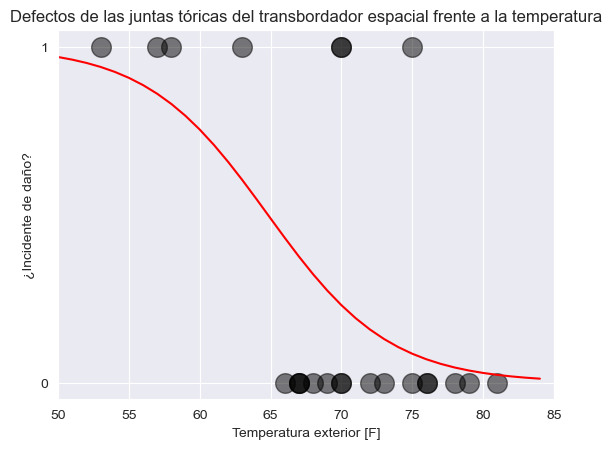

In [15]:
# Grafico
plt.figure()
sns.set_style('darkgrid')
np.set_printoptions(precision=3, suppress=True)

plt.scatter(temperature, failures, s=200, color="k", alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("¿Incidente de daño?")
plt.xlabel("Temperatura exterior [F]")
plt.title("Defectos de las juntas tóricas del transbordador espacial frente a la temperatura")
plt.tight_layout

x = np.arange(50, 85)
alpha = model.params[0]
beta = model.params[1]

y = 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

plt.plot(x,y,'r')
plt.xlim([50, 85])

plt.show()

Elementos: 
1. Una distribución de probabilidad, que determina la probabilidad del resultado de un ensayo dado (distribución binomial) 
2. Un modelo lineal que relaciona las covariables (temperatura) con las variables (la falla/éxito de una junta tórica) 
3. Una función de enlace que envuelve el modelo lineal para producir el parámetro para la distribución de probabilidad (función logística).

# 13.4 GLM 2: Regresión logística ordinal

## 13.4.1 Modelo

El modelo de regresión logística ordinal (o modelo de probabilidades proporcionales): es un modelo lineal generalizado diseñado para el caso de predecir variables ordinales, es decir, variables que son discretos (como en la clasificación) pero que pueden ordenarse (como en la regresión). 

$ P(y \leq j|X_i) = \phi(\theta_j - w^T X_i) = \frac{1}{1 + exp(w^T X_i - \theta_j)} $

$w$ y $\theta$ son vectores a estimar a partir de los datos

$\phi$ es la función logística definida como $\phi(t) = \frac{1}{1+exp(−t)} $

En comparación con la regresión logística multiclase, hemos agregado la restricción de que los hiperplanos que separan las diferentes clases son paralelos para todas las clases, es decir, el vector $w$ es común para todas las clases. 

Para decidir a qué clase se va a predecir $X_i$ hacemos uso del vector de umbrales $\theta$. 

Si hay $K$ clases diferentes, $\theta$ es un vector no decreciente ($\theta_1 \leq \theta_2 \leq ... \leq \theta_{K−1})$ de tamaño $K − 1$. 

Asignaremos la clase $j$ si la predicción $w^TX$ se encuentra en el intervalo [$\theta_{j−1}, \theta_j$]. 

Para mantener la misma definición para las clases extremas, definimos $\theta_0 = -\infty$ y $\theta_K = \infty$. 

Estamos buscando un vector $w$ tal que $X · w$ produzca un conjunto de valores que están bien separados en las diferentes clases por los diferentes umbrales $\theta_i$.

Modelo de riesgos proporcionales McCullagh

Probabilidad 

$ - log (1 - P(y \leq j|X_i)) = exp(\theta_j - w^T · X_i) $

Son posibles otras funciones de enlace, donde la función de enlace satisface 

$ link(P(y \leq j|X_i)) = \theta_j - w^T · X_i $ 

El modelo de regresión logística ordinal tiene una función de enlace logístico.

El modelo de riesgos proporcionales tiene una función de enlace logarítmico. 

El modelo de regresión logística ordinal se conoce como modelo de probabilidades proporcionales porque la razón de las probabilidades correspondientes para 2 muestras diferentes $X_1$ y $X_2$ es $exp(w^T·(X_1 − X_2))$ y, por lo tanto, no depende de la clase $j$ sino solo de la diferencia entre las muestras $X_1$ y $X_2$.

## 13.4.2 Optimización

La estimación del modelo se puede plantear como un problema de optimización. 

Minimizamos la función de pérdida para el modelo, definida como menos el logaritmo de verosimilitud:

$ L(w, \theta) = - \sum\limits_{i=1}^n log(\phi(\theta_{yi} - w^T X_i) - \phi(\theta_{yi - 1} - w^T X_i))$

En esta suma, todos los términos son convexos en $w$.

La función de pérdida es convexa en $w$. 

Usando la fórmula $log(\phi(t))' = (1 − \phi(t))$, podemos calcular el gradiente de la función de pérdida como

$ \nabla L(w, \theta) = \sum\limits_{i=1}^n X_i (1 − \phi(\theta_{y_i} - w^T X_i) - \phi(\theta_{y_i - 1} - w^T X_i)) $

$ \nabla L(w, \theta) = \sum\limits_{i=1}^n e_{y_i} \left(1 − \phi(\theta_{y_i} - w^T X_i) - \frac{1}{1 - exp(\theta_{y_i-1} - \theta_{y_i})}\right) + e_{y_i-1} \left(1 − \phi(\theta_{y_i - 1} - w^T X_i) - \frac{1}{1 - exp(- (\theta_{y_i - 1} - \theta_{y_i}))}\right) $

$e_i$ es el i-ésimo vector canónico

## 13.4.3 Rendimiento

Fabian Pedregosa ha comparado la precisión de predicción de este modelo en el sentido de error absoluto medio en los precios de la vivienda de Boston, un conjunto de datos comúnmente utilizado en el aprendizaje automático. 

Para tener una variable ordinal, redondeó los valores al entero más cercano, lo que resultó en un problema de tamaño $506 ∗ 13$ con 46 valores objetivo diferentes. 

Aunque no fue un gran aumento en la precisión, este modelo brindó mejores resultados en este conjunto de datos en particular. 

Aquí, la regresión logística ordinal es el modelo con mejor rendimiento, seguido por un modelo de regresión lineal y uno contra todos.

In [6]:
data = pd.read_csv(r'Datos\BostonHousing.csv', delimiter = ',')

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
from sklearn import linear_model, metrics, preprocessing, datasets

In [7]:
# Convertir los datos de Pandas a un array de Numpy

X = data.drop(columns=['medv'])  

y = data['medv'].values  

In [8]:
# Realizar preprocesamiento en X

scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)

In [9]:
# Redondear y convertir y a valores enteros

y = np.round(y).astype(np.int32)

In [10]:
class Classifier:
    """ Clasificadores, para comparar diferentes modelos
    name : nombre del clasificador
    clf : clasificador, con la sintaxis de scikit-learn
    scores : puntajes de las carreras de entrenamiento

    """

    def __init__(self, name: str, model):
        """Constructor"""
        self.name = name
        self.clf = model
        self.scores = []

In [11]:
def printProgressBar(iteration: int,
                      total: int,
                      prefix: str = '',
                      suffix: str = '',
                      decimals: int = 1,
                      length: int = 100,
                      fill: str = '█',
                      printEnd: str = "\r") -> None:
    """ Llame en un bucle para crear la barra de progreso del terminal

    Parameteros
    -----=----
    iteration: iteración actual [requerido]
    total    : iteraciones totales [obligatorio]
    prefix   : cadena de prefijo
    suffix   : cadena de sufijo
    decimals : número positivo de decimales en porcentaje completo
    length   : longitud de caracteres de la barra
    fill     : carácter de relleno de barra
    printEnd : último carácter (e.g. "\r", "\r\n")
    """
    value = 100*iteration/total
    percent = ("{0:." + str(decimals) + "f}").format(value)
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    #if iteration == total:
        #print()


In [14]:
import mord
from sklearn.model_selection import ShuffleSplit

In [17]:
models = []

# Crea los 3 modelos

models.append(Classifier('logistic', linear_model.LogisticRegression(C=1., random_state=0, max_iter=1000)))
models.append(Classifier('oridinal_logistic', mord.LogisticAT(alpha=1.)))
models.append(Classifier('ridge', linear_model.Ridge(alpha=1.)))

# Realizar entrenamiento repetido, para proporcionar una comparación realista

n_splits = 50
rs = ShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)

for i, (train, test) in enumerate(rs.split(X)):
    printProgressBar(i, n_splits, prefix = 'Progress:',
                         suffix = 'Complete', length = 40)

    # Necesitamos que el conjunto de trenes contenga todas las clases diferentes
    if set(y[train]) != set(y):
        continue

    # Clasificador logístico
    for model in models:
        model.clf.fit(X[train], y[train])
        model.scores.append(metrics.mean_absolute_error(model.clf.predict(X[test]), y[test]))

In [19]:
# Extract and print the data

names = []
scores = []
errors = []

In [20]:
for model in models:
    name = model.name
    score = np.mean(model.scores)
    error = np.std(model.scores)

    print(f'Error absoluto medio {name.upper():18s}:{score:.2f} +/- {error:.2f}')

    names.append(name)
    scores.append(score)
    errors.append(error)

Error absoluto medio LOGISTIC          :3.46 +/- 0.48
Error absoluto medio ORIDINAL_LOGISTIC :2.67 +/- 0.37
Error absoluto medio RIDGE             :3.40 +/- 0.37


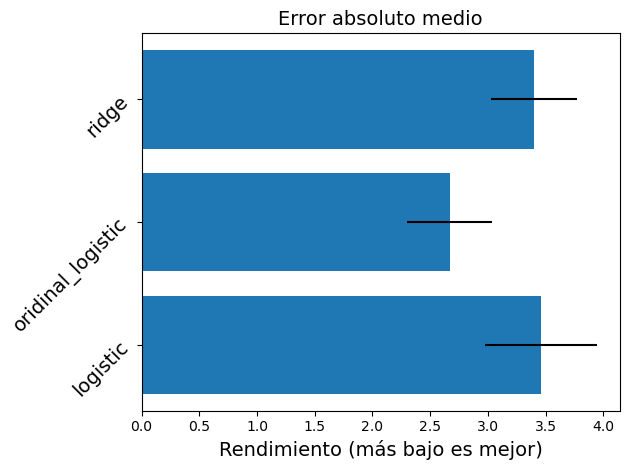

In [22]:
# Generar un gráfico de barras horizontales, con barras de error

fig, ax = plt.subplots()

y_pos = np.arange(len(names))

ax.barh(y_pos, scores, xerr=errors, align='center')

ax.set_yticks(y_pos)

ax.set_yticklabels(names, rotation=45, fontsize=14)

ax.set_xlabel('Rendimiento (más bajo es mejor)', fontsize=14)

ax.set_title('Error absoluto medio', fontsize=14)

plt.tight_layout()

plt.show()

# 13.5 Ejercicios

1. Encontrando la Flor Correcta 

a) Tome los datos del iris (vea la Sección 11.2.1), y grafique para qué longitud de pétalo las flores medidas son de la especie iris setosa (vea la Fig. 13.5). 

b) Ajustar una curva de regresión logística a los datos y superponerla en el gráfico. 

c) Encuentre la mayor longitud del sépalo donde todavía tiene un 10% de posibilidades de tener un iris setoso.


$\textbf{a)}$

In [2]:
# Datos
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Cree un marco de datos, con columnas adecuadas para el ajuste
df = pd.DataFrame()
df['length'] = np.unique(iris.sepal_length)
df['num_setosa'] = 0
df['num_others'] = 0
df.index = df.length    # hacer que la 'longitud' sea independiente

In [4]:
df

,length,num_setosa,num_others
length,,,
4.3,4.3,0,0
4.4,4.4,0,0
4.5,4.5,0,0
4.6,4.6,0,0
4.7,4.7,0,0
4.8,4.8,0,0
4.9,4.9,0,0
5.0,5.0,0,0
5.1,5.1,0,0


In [5]:
# Cuente el número de 'setosa' y 'otros', para cada longitud
for cur_length in df.length:
    df.loc[cur_length, 'num_setosa'] = ((iris.sepal_length == cur_length) & (iris.species == 'setosa')).sum()
    df.loc[cur_length, 'num_others'] = ((iris.sepal_length == cur_length) & (iris.species != 'setosa')).sum()

In [6]:
df

,length,num_setosa,num_others
length,,,
4.3,4.3,1,0
4.4,4.4,3,0
4.5,4.5,1,0
4.6,4.6,4,0
4.7,4.7,2,0
4.8,4.8,5,0
4.9,4.9,4,2
5.0,5.0,8,2
5.1,5.1,8,1


In [7]:
# Solo para verificar el número total
df['total'] = df.num_setosa + df.num_others

In [8]:
df

,length,num_setosa,num_others,total
length,,,,
4.3,4.3,1,0,1
4.4,4.4,3,0,3
4.5,4.5,1,0,1
4.6,4.6,4,0,4
4.7,4.7,2,0,2
4.8,4.8,5,0,5
4.9,4.9,4,2,6
5.0,5.0,8,2,10
5.1,5.1,8,1,9


In [9]:
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

In [10]:
model = glm('num_others + num_setosa ~ length', data=df, family=Binomial()).fit()
print(model.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['num_others', 'num_setosa']   No. Observations:                   35
Model:                                      GLM   Df Residuals:                       33
Model Family:                          Binomial   Df Model:                            1
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -15.706
Date:                          Wed, 02 Aug 2023   Deviance:                       14.891
Time:                                  14:10:59   Pearson chi2:                     14.1
No. Iterations:                               7   Pseudo R-squ. (CS):             0.9667
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

$\textbf{b)}$

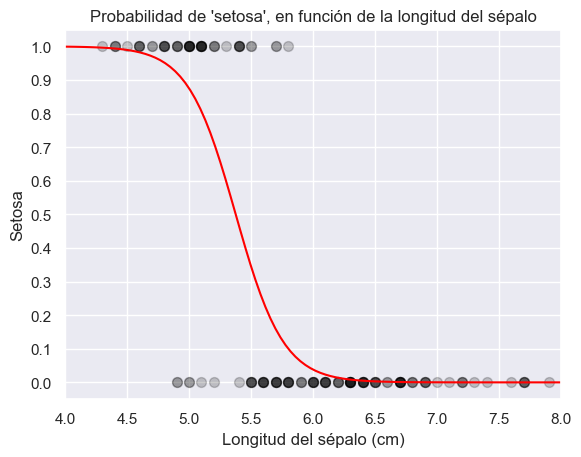

In [11]:
sns.set_context('notebook')

sepal_length = iris.sepal_length

# First plot the original data
plt.figure()
sns.set_style('darkgrid')
np.set_printoptions(precision=3, suppress=True)

plt.scatter(iris.sepal_length, iris.species=='setosa', s=50, color="k", alpha=0.2)
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel("Setosa")
plt.xlabel("Longitud del sépalo (cm)")
plt.title("Probabilidad de 'setosa', en función de la longitud del sépalo")
plt.tight_layout

# Grafico el ajuste
x = np.linspace(4, 8, 100)
alpha = model.params[0]
beta = model.params[1]
y = 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

plt.plot(x, y,'r')
plt.xlim([4, 8])

plt.show()

$\textbf{c)}$

In [12]:
lengths = [5, 6]

In [17]:
# Encontrar el valor de x más cercano
for length in lengths:
    index = np.max(np.where(x<length))
    print(f'Por una longitud de {length:4.2f} cm, la probabilidad de ser una "setosa" es {y[index]:5.3f}\n')

# Encuentre la duración máxima de tener al menos un 10% de posibilidades de ser 'setosa'
chance = 10/100 # [%]

max_index = np.max(np.where(y>chance))
print(f'La longitud máxima en la que todavía tiene un {chance*100:3.0f}% de probabilidad de ser una "setosa" es {x[max_index]:3.1f} cm.')

Por una longitud de 5.00 cm, la probabilidad de ser una "setosa" es 0.892

Por una longitud de 6.00 cm, la probabilidad de ser una "setosa" es 0.042

La longitud máxima en la que todavía tiene un  10% de probabilidad de ser una "setosa" es 5.8 cm.
